In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('../..')

In [3]:
os.getcwd()

'/Users/ylee/Desktop/sars-cov-2/covid-19-staging'

In [4]:
from data_pipelines import kr_covid_data

In [5]:
kr_data = kr_covid_data.get()

In [6]:
cities = kr_data['regions']
total = kr_data['total']
testing = kr_data['testing']

In [7]:
cities.loc['Daegu'].iloc[-5:-1, :]

,active,confirmed_acc,death_acc,released_acc,confirmed,death,released
date,,,,,,,
2020-04-14,1230,6822,152,5440,3,5,45
2020-04-15,1182,6823,155,5486,1,3,46
2020-04-16,1083,6827,158,5586,4,3,100
2020-04-17,1042,6827,159,5626,0,1,40


In [8]:
total.iloc[-5:-1, :]

,active,confirmed_acc,death_acc,released_acc,confirmed,death,released
date,,,,,,,
2020-04-13,2873,10537,217,7447,25,3,79
2020-04-14,2808,10564,222,7534,27,5,87
2020-04-15,2750,10591,225,7616,27,3,82
2020-04-16,2627,10613,229,7757,22,4,141


In [9]:
testing.iloc[-5:-1, :]

,confirm_rate,confirmed_acc,negative_acc,testing,confirmed,negative
date,,,,,,
2020-04-13,0.020851,10537,494815,13391,25,4494
2020-04-14,0.020601,10564,502223,14651,27,7408
2020-04-15,0.020386,10591,508935,15026,27,6712
2020-04-16,0.020234,10613,513894,14268,22,4959


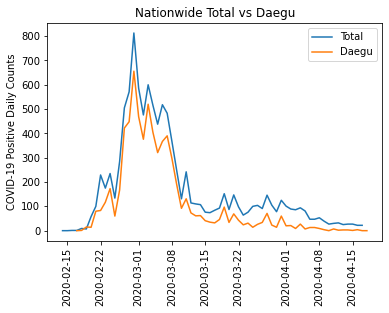

In [10]:
# majority of the cases are from Daegu
plt.plot(testing.index, testing['confirmed'], label='Total')
plt.plot(cities.loc['Daegu'].index, cities.loc['Daegu', 'confirmed'], label='Daegu')
plt.legend()
plt.ylabel('COVID-19 Positive Daily Counts')
plt.xticks(rotation=90);
plt.title('Nationwide Total vs Daegu');

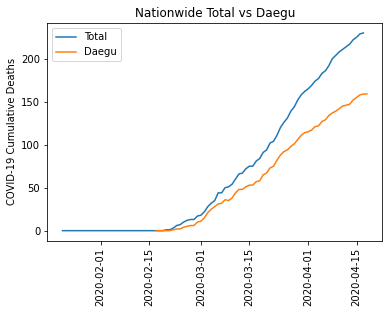

In [11]:
# majority of the cases are from Daegu
plt.plot(total.index, total['death_acc'], label='Total')
plt.plot(cities.loc['Daegu'].index, cities.loc['Daegu', 'death_acc'], label='Daegu')
plt.legend()
plt.ylabel('COVID-19 Cumulative Deaths')
plt.xticks(rotation=90);
plt.title('Nationwide Total vs Daegu');

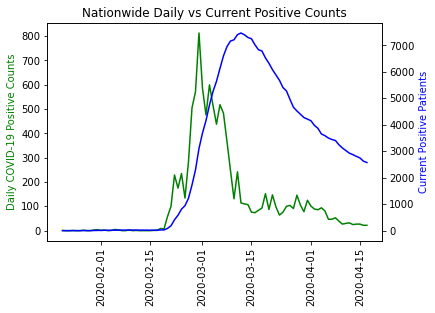

In [12]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(total.index, total['confirmed'], 'g-')
ax2.plot(total.index, total['active'], 'b-')

ax1.set_ylabel('Daily COVID-19 Positive Counts', color='g')
ax2.set_ylabel('Current Positive Patients', color='b')

plt.title('Nationwide Daily vs Current Positive Counts');

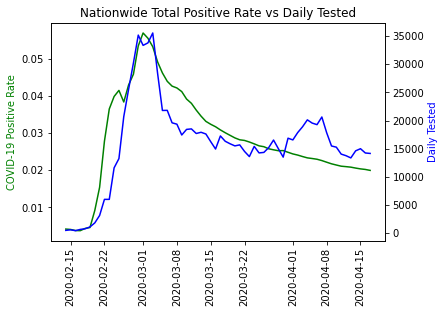

In [13]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(testing.index, testing['confirm_rate'], 'g-')
ax2.plot(testing.index, testing['testing'], 'b-')

ax1.set_ylabel('COVID-19 Positive Rate', color='g')
ax2.set_ylabel('Daily Tested', color='b')

plt.title('Nationwide Total Positive Rate vs Daily Tested');

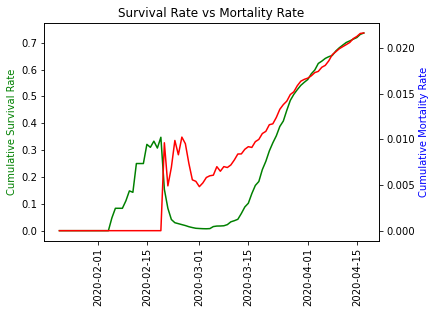

In [14]:
# recovery rate vs mortality rate
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

mortality_rate = total['death_acc']/total['confirmed_acc']
survival_rate = total['released_acc']/total['confirmed_acc']

ax2 = ax1.twinx()
ax1.plot(total.index, survival_rate, 'g-')
ax2.plot(total.index, mortality_rate, 'r-')

ax1.set_ylabel('Cumulative Survival Rate', color='g')
ax2.set_ylabel('Cumulative Mortality Rate', color='b')

plt.title('Survival Rate vs Mortality Rate');

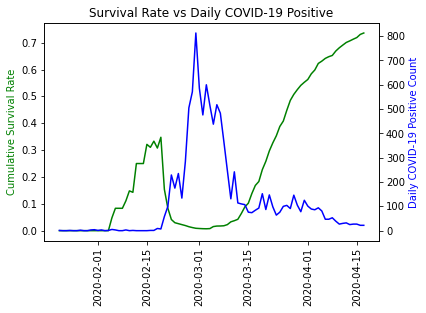

In [15]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(total.index, survival_rate, 'g-')
ax2.plot(total.index, total['confirmed'], 'b-')

ax1.set_ylabel('Cumulative Survival Rate', color='g')
ax2.set_ylabel('Daily COVID-19 Positive Count', color='b')

plt.title('Survival Rate vs Daily COVID-19 Positive');